#### Machine Learning Backend

**Data Description**

> - **Age**: _Age of the customer._
> - **Gender**: _Gender of the customer (categorical)_
> - **Income**: _Annual income in dollars._
> - **Browsing_Hours**: _Hours spent browsing the website._
> - **Cart_Abandonment**: _Whether the customer abandoned their shopping cart ("Yes" or "No")._
> - **Purchase**: _Target variable (1 = Made a purchase, 0 = Did not make a purchase)._

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [13]:
# Load the dataset
data = pd.read_csv('PurchaseData.csv')
print(data.head())


   Age  Gender  Income  Browsing_Hours Cart_Abandonment  Purchase
0   23    Male   45000             1.5              Yes         0
1   35  Female   80000             3.0               No         1
2   45  Female   60000             2.2              Yes         0
3   30    Male   75000             4.0               No         1
4   50  Female   55000             2.7              Yes         0


In [14]:

# Quick overview of the dataset
print(data.head())
print(data.info())
# Check for missing values
print("Missing Values:\n", data.isnull().sum())
print(data.describe())


   Age  Gender  Income  Browsing_Hours Cart_Abandonment  Purchase
0   23    Male   45000             1.5              Yes         0
1   35  Female   80000             3.0               No         1
2   45  Female   60000             2.2              Yes         0
3   30    Male   75000             4.0               No         1
4   50  Female   55000             2.7              Yes         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10 non-null     int64  
 1   Gender            10 non-null     object 
 2   Income            10 non-null     int64  
 3   Browsing_Hours    10 non-null     float64
 4   Cart_Abandonment  10 non-null     object 
 5   Purchase          10 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 608.0+ bytes
None
Missing Values:
 Age                 0
Gender          

##### Data Preprocessing

In [15]:
# Fill missing values or drop rows with missing data
data = data.dropna()  # Or use data.fillna() to fill missing values


In [16]:
# Convert categorical features to dummy variables
data = pd.get_dummies(data, drop_first=True)


##### EDA

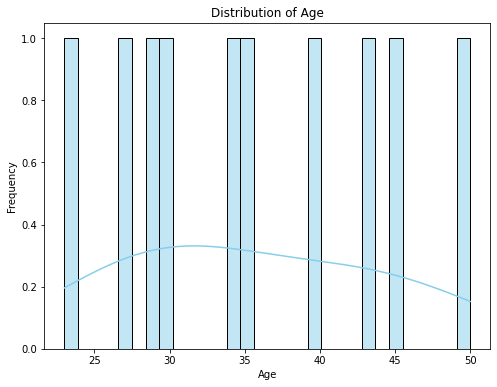

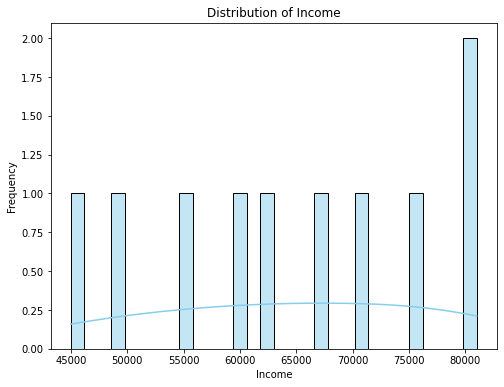

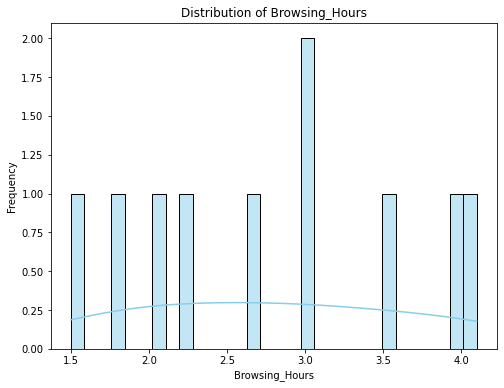

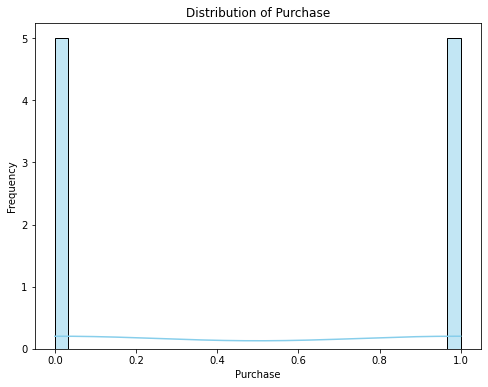

In [17]:
# Visualize the distribution of numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

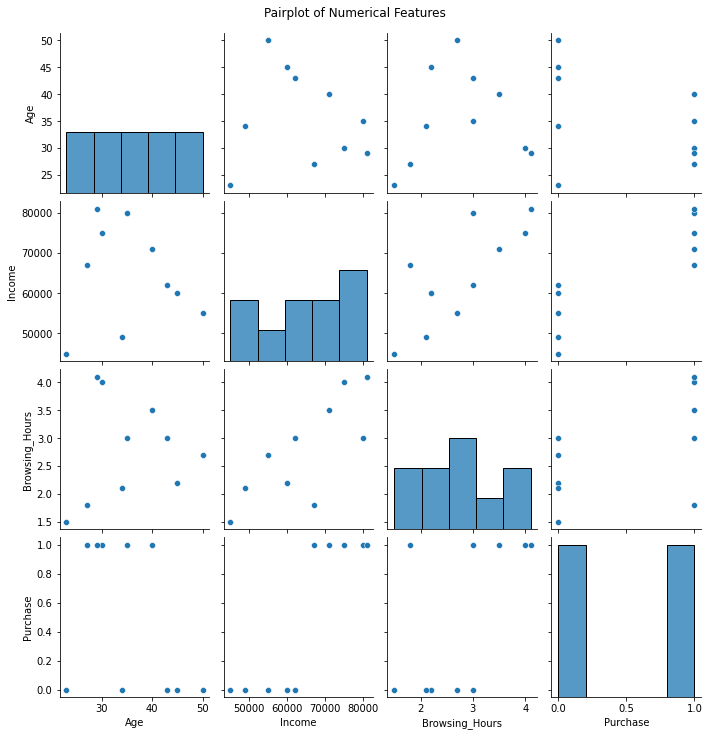

In [18]:
# Pairplot to show relationships between features (for numerical features)
sns.pairplot(data[numerical_columns])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

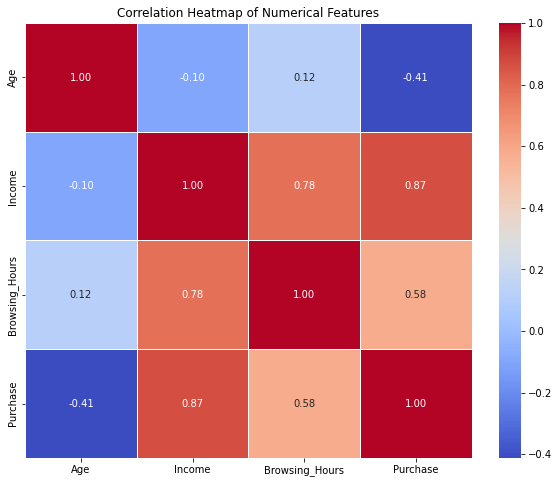

In [19]:
# Correlation heatmap to check relationships between numerical features
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

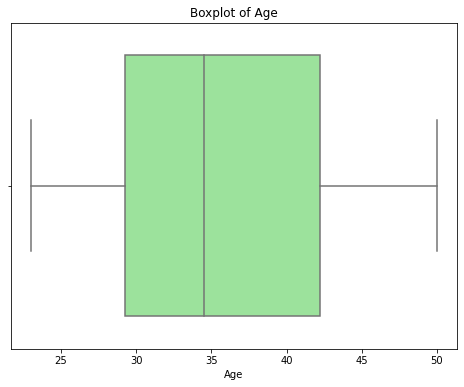

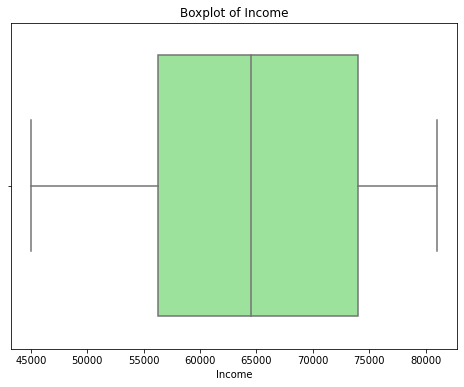

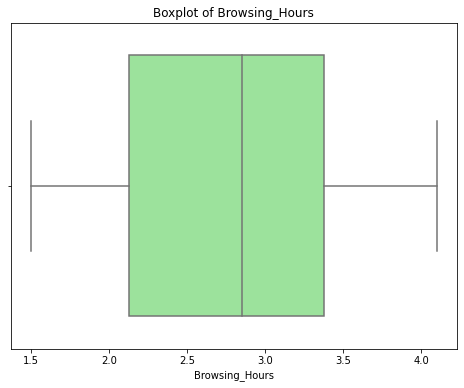

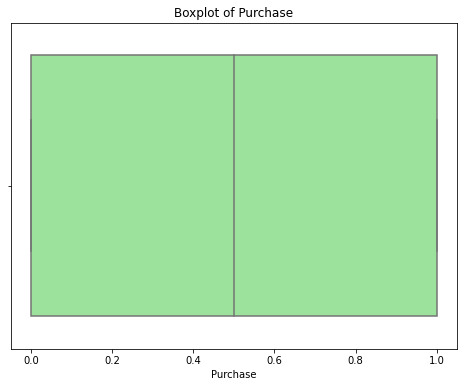

In [20]:
# Boxplot to check for outliers in numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

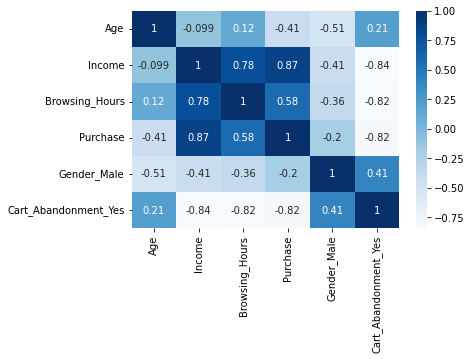

In [21]:
# Visualizing relationships between features (Pairwise scatter plots)
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

##### Split Features and Target

In [22]:
#  Separate the features (X) and the target variable (y).
X = data.drop('Purchase', axis=1)
y = data['Purchase']

In [23]:
# Train-Test Split: Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Feature Scaling: Scale the features to standardize them, which helps some algorithms perform better.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Build the Model

In [25]:
#Random Forest Classifier
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##### Model Evaluation

In [26]:

# After training the model, it’s essential to evaluate its performance using the test set.

In [27]:
# Make Predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluate the Model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)



Accuracy: 0.67
Confusion Matrix:
 [[0 0]
 [1 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Output Explanation

- Accuracy: This metric shows how well the model performs on the test data.

- Confusion Matrix: It shows the breakdown of correct and incorrect predictions.

- Classification Report: This report includes precision, recall, and F1-score, which are useful for understanding the model’s strengths and weaknesses.

#### Save the Model

To save the trained model for future use, you can use Python’s pickle library.

In [29]:
import pickle
# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)


implement a few different machine learning algorithms

- Logistic Regression (for binary classification problems)

- Support Vector Machine (SVM) (for classification)

- Gradient Boosting Classifier (for classification)

- Decision Tree Classifier (for classification)

- XGBoost (for classification)

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



C:\Users\DELL\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [31]:
# --- 1. Logistic Regression ---
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Evaluation:
Accuracy: 0.67
[[0 0]
 [1 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# --- 2. Support Vector Machine (SVM) ---
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSupport Vector Machine (SVM) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



Support Vector Machine (SVM) Evaluation:
Accuracy: 0.67
[[0 0]
 [1 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# --- 4. Decision Tree Classifier ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))






Decision Tree Classifier Evaluation:
Accuracy: 1.00
[[3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [35]:
# --- 5. Gradient Boosting Classifier ---
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("\nGradient Boosting Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.2f}")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))



Gradient Boosting Classifier Evaluation:
Accuracy: 0.67
[[0 0]
 [1 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# --- 6. Random Forest Classifier ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest Classifier Evaluation:
Accuracy: 0.67
[[0 0]
 [1 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# --- 7. XGBoost Classifier ---
xg = xgb.XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
print("\nXGBoost Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xg):.2f}")
print(confusion_matrix(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))

[19:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBoost Classifier Evaluation:
Accuracy: 0.00
[[0 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to contr